# Multi-Template-Matching
## Tutorial 1 - Introduction

This tutorial gives an overview of the different ways to use multiple template matching for object recognition.  
More documentation is available in the [wiki](https://github.com/LauLauThom/MultiTemplateMatching/wiki) section of the repository.

## Citations
If you use this implementation for your research, please cite:

Thomas, L.S.V., Gehrig, J.   
*Multi-template matching: a versatile tool for object-localization in microscopy images.*  
BMC Bioinformatics 21, 44 (2020). https://doi.org/10.1186/s12859-020-3363-7

-------------------------

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This tutorial is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.  
You are free to distribute and/or modify this tutorial, provided you attribute the author:  

Multi-Template Matching python package online - _Tutorial 1: Introduction_  
Laurent Thomas - 2019   
https://github.com/multi-template-matching/MultiTemplateMatching-Python/blob/master/tutorials/Tutorial1-Introduction.ipynb

## Let's code !

In [1]:
# Set the active directory to the repos' root when locally testing (not necessary if MTM installed with pip) 
%cd ..

C:\Users\Laurent Thomas\Documents\repo-MTM-Python


In [2]:
# 1st import the package and check its version
import MTM
print("MTM version: ", MTM.__version__)

from MTM import matchTemplates, drawBoxesOnRGB, drawBoxesOnGray

import cv2
from skimage.data import coins

%matplotlib inline
import matplotlib.pyplot as plt

MTM version:  1.5.4


The main function in MTM is `matchTemplates`.  
Let's have a look at its docstring.

In [3]:
matchTemplates?

As you can read from the doc, the function have 2 main image arguments :
- a list of template images to search
- an image in which to search for objects using the templates

Let's open some image of coins from scikit-image, we will showcase the multi-template matching for the detection of the coin locations

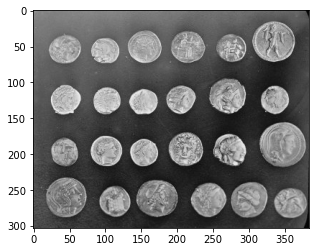

In [4]:
image = coins()
plt.imshow(image, cmap="gray")

## - crop a template  
We need some template image to search in the image.  
We can simply crop some coins from the image.  
__NB : templates are always rectangular (there are image matrices). And thus the predicted locations are always rectangular too !__

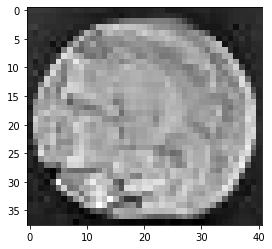

In [5]:
smallCoin = coins()[37:37+38, 80:80+41] 
plt.imshow(smallCoin, cmap="gray")

## - Calling matchTemplates with a single template
We will now use the `matchTemplates` that we have seen above.

In [6]:
listTemplate = [smallCoin]

# Then call the function matchTemplates (here a single template)
Hits = matchTemplates(listTemplate, image, score_threshold=0.5, maxOverlap=0)

Here the coins are nicely separated so we do not expect any overlap between the predicted coins locations ie `maxOverlap=0`.  
For the score, we use a normalised cross-correlation `cv2.TM_CCOEFF_NORMED`, which is robust to illumination changes.  
Such score ranges from 0 to 1 and a good score is close to 1. `score_threshold=0.5` is thus usually a safe value.

Let's have a look at `Hits`...

In [7]:
print("Found {} hits".format( len(Hits) ) )
Hits

Found 18 hits


[[1.0000000000000004, (80, 37, 41, 38), 0],
 [0.8608097695066887, (133, 108, 41, 38), 0],
 [0.8161441155237327, (134, 178, 41, 38), 0],
 [0.8004734328123152, (82, 106, 41, 38), 0],
 [0.7478864303085989, (316, 105, 41, 38), 0],
 [0.7422432994918281, (23, 178, 41, 38), 0],
 [0.6853158909048802, (185, 103, 41, 38), 0],
 [0.6578591227482514, (257, 34, 41, 38), 0],
 [0.6179521133322369, (26, 103, 41, 38), 0],
 [0.6066916640600301, (22, 37, 41, 38), 0],
 [0.5857662249053885, (335, 247, 41, 38), 0],
 [0.578679336655169, (227, 239, 41, 38), 0],
 [0.5769805932642459, (95, 244, 41, 38), 0],
 [0.5438409763035467, (286, 237, 41, 38), 0],
 [0.5254601060190446, (251, 106, 41, 38), 0],
 [0.5249841623864879, (157, 234, 41, 38), 0],
 [0.511434863655266, (134, 37, 41, 38), 0],
 [0.5068316476433966, (196, 27, 41, 38), 0]]

The function `matchTemplates` returns a list of hits, each encoded as a list of 4 elements:
- the correlation score with the template for that hit  
- the coordinates of the bounding box in the image (x, y, width, height)
- the index of the corresponding template in the list of templates

The first hit in the list has a score of 1 and is the coin that is used as template.

## - View the detections
We can then represent the detections as bounding boxes overlaid on the image.

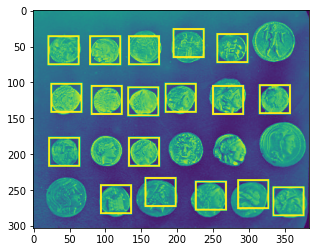

In [8]:
Overlay = drawBoxesOnGray(image, Hits, thickness=3)
plt.imshow(Overlay)

## - Decreasing the score-threshold
This is pretty good already but we dont catch some of the small coins.  
Let's reduce the score threshold to be more permissive e.g. `score_threshold = 0.4`

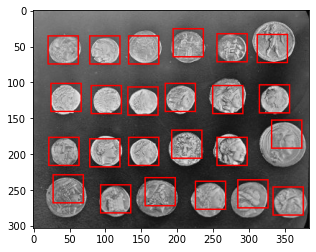

In [9]:
Hits = matchTemplates(listTemplate, image, score_threshold=0.4, maxOverlap=0)
Overlay = drawBoxesOnRGB(image, Hits)
plt.imshow(Overlay)

## - Using multiple templates
Using a single template is quite good already for this particular example.    
What if now we would like to do better and somehow differentiate between small and large coins...  
The function matchTemplates allow to use several templates, and yields the best detections for each location in the image. 

Let's crop one of the big coin to use as a second template.

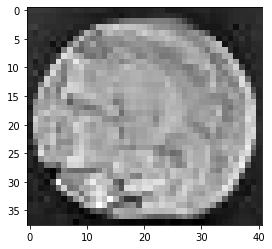

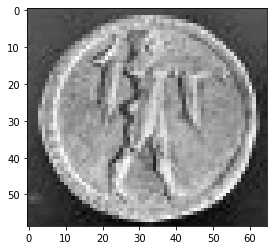

In [10]:
largeCoin = coins()[14:14+59,302:302+65]
plt.figure(0)
plt.imshow(smallCoin, cmap="gray")
plt.figure(1)
plt.imshow(largeCoin, cmap="gray")

Again we pack the templates in a list before calling the function `matchTemplates` and displaying the result.

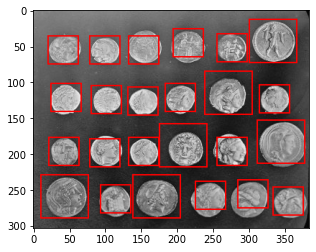

In [11]:
listTemplate = [smallCoin, largeCoin]
Hits = matchTemplates(listTemplate, image, score_threshold=0.4, maxOverlap=0)
Overlay = drawBoxesOnRGB(image, Hits)
plt.imshow(Overlay)

Et voila !  
Using several templates can be used to increase the chance to catch your object if it appears with different perspectives, or to perform classification of the detections using different templates as "classes".  
However, the more templates the longer the computation time.